In [60]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [61]:
# download the mnist dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [62]:
# normalize the data
x_train, x_test = x_train / 255., x_test / 255.

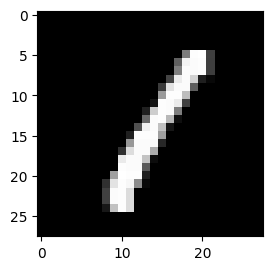

In [63]:
# view an image
import matplotlib.pyplot as plt

sample = x_train[3]
fig = plt.subplot(1,2,1)
fig.imshow(sample, cmap="gray")
plt.show()

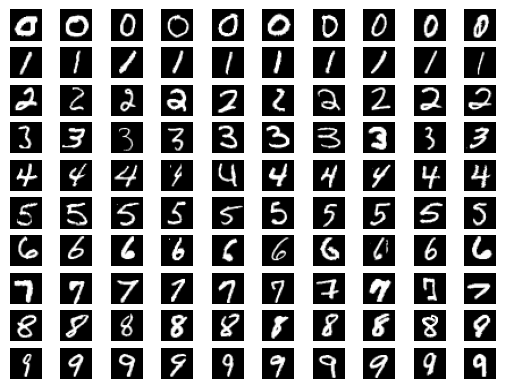

In [64]:
# view multiple images
import numpy as np
n_rows = 10
n_cols = 10
fig, axes = plt.subplots(n_rows, n_cols)

for i in range(n_rows):
  for j in range(n_cols):
    index = np.random.choice(np.where(y_train == i)[0])
    axes[i][j].axis('off')
    axes[i][j].grid('off')
    axes[i][j].imshow(x_train[index], cmap="gray")

In [65]:
# Build a machine learning model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10) # there are 10 digits -> 10 output in the Dense layer
])

In [66]:
predictions = model(x_train[:1]).numpy()
print(predictions.shape)
predictions

(1, 10)


array([[ 0.3152314 ,  0.4550006 , -0.15999228,  0.9409483 , -0.23545794,
         0.18392202, -0.4311976 , -0.44372228, -0.07971813, -0.26605916]],
      dtype=float32)

In [67]:
# use softmax to convert scores for predictions into probabilities
tf.nn.softmax(predictions).numpy()

array([[0.12091983, 0.13905881, 0.07518142, 0.22607   , 0.0697166 ,
        0.10604022, 0.05732282, 0.05660934, 0.08146539, 0.06761551]],
      dtype=float32)

In [68]:
# sum of all probabilities is 1
tf.nn.softmax(predictions).numpy().sum()

0.9999999

In [69]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [70]:
print(tf.math.log(1/10))

tf.Tensor(-2.3025851, shape=(), dtype=float32)


In [71]:
print(y_train[:2].shape) # take two samples -> change predictions
predictions = model(x_train[:2]).numpy()

(2,)


In [72]:
loss_fn(y_train[:2], predictions).numpy()

2.27536

In [73]:
# compile the model before training
model.compile(
    optimizer="adam",
    loss=loss_fn,
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [74]:
784*128 + 128

100480

In [75]:
# train model
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2982 - accuracy: 0.9115
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1441 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1080 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0755 - accuracy: 0.9762


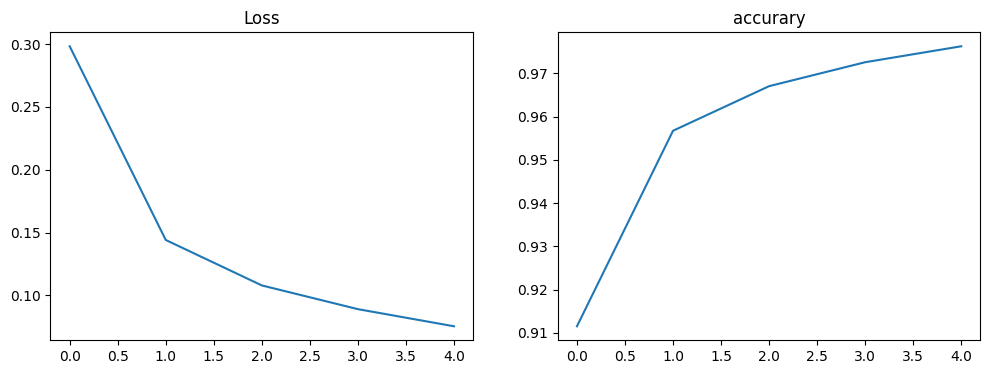

In [76]:
# visualize
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'])

plt.subplot(1,2,2)
plt.title('accurary')
plt.plot(history.history['accuracy'])
plt.show()

In [77]:
# Evaluate the model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0734 - accuracy: 0.9776 - 609ms/epoch - 2ms/step


[0.07339736819267273, 0.9775999784469604]

In [78]:
# modify the layer output of the model to return probability with softmax function
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [79]:
probability_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 10)                101770    
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [87]:
# predictions
pred = probability_model(x_test[:5]).numpy() # 5 samples
pred.shape

(5, 10)

In [91]:
pred

array([[3.2594982e-09, 1.9531667e-09, 3.9402471e-06, 3.2838103e-05,
        1.9245880e-13, 3.9074180e-08, 6.4172508e-15, 9.9996197e-01,
        3.5423250e-07, 1.0126998e-06],
       [6.1760397e-09, 5.9586277e-05, 9.9986959e-01, 7.0840870e-05,
        4.3746933e-16, 6.5867605e-09, 5.0564135e-09, 1.2656652e-13,
        4.0470891e-08, 7.2597976e-16],
       [1.7218397e-07, 9.9835038e-01, 5.5956836e-05, 1.7030297e-05,
        3.2072781e-05, 3.8178523e-06, 1.4053902e-05, 1.4640921e-03,
        6.2126041e-05, 3.8742019e-07],
       [9.9998975e-01, 6.5472607e-11, 1.8374091e-06, 1.0595857e-07,
        3.2957415e-09, 1.6115598e-06, 1.0844655e-06, 2.1941596e-06,
        2.2252697e-08, 3.3253482e-06],
       [7.3385536e-06, 6.5381554e-09, 6.7551759e-05, 8.1289897e-08,
        9.8087603e-01, 7.0709291e-07, 9.0935936e-07, 3.0078759e-04,
        7.4918839e-06, 1.8739168e-02]], dtype=float32)

In [92]:
pred.sum()

5.0000005

In [93]:
pred[3].sum()

0.99999994